# Task # 3 - To Explore Unsupervised Machine Learning

From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import matplotlib.patches as mpatches
import numpy as np
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris_df = pd.DataFrame(iris["data"] ,columns=iris["feature_names"])
y = pd.DataFrame(iris.target, columns=['target_names'])

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y.head()

,target_names
0,0
1,0
2,0
3,0
4,0


In [7]:
x = iris_df.iloc[:,[0,1,2,3]].values
y = iris.target

In [8]:
from sklearn.cluster import KMeans

# ELBOW METHOD

Text(0.5, 0, 'No. of clusters')

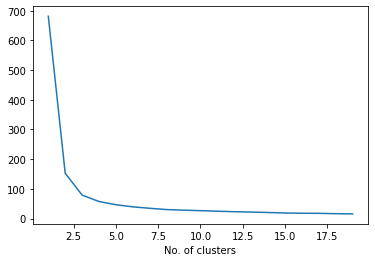

In [14]:
abc = []
for i in range(1,20):                #elbow
    km =KMeans(n_clusters=i)
    km.fit(x)
    abc.append(km.inertia_)

sns.lineplot(range(1,20),abc)
plt.xlabel("No. of clusters")

In [10]:
km_final = KMeans(n_clusters=3)
km_final.fit_predict(x)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [11]:
km_final.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [12]:
km_final.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

# Classification done

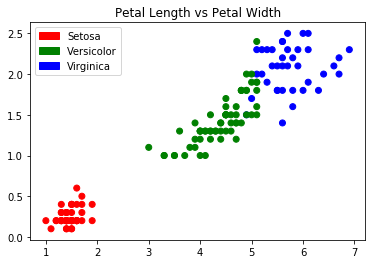

In [13]:
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')
colors = np.array(['red', 'green', 'blue'])
predictedY = np.choose(km_final.labels_, [0,1,2]).astype(np.int64)
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=colors[predictedY])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])